### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#imports
import scipy.io
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import obspy
import pywt
import pywt.data

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

### Load the trimmed data 

In [3]:
dir_path = "/Users/ecem/Documents/GitHub/seismocardiogram/data/diseased-dataset/Raw_Recordings"
csv_path = "/Users/ecem/Desktop/csv of scgs"

In [4]:
ms_as = np.load(dir_path + "/MS-AS-10sec.npy", allow_pickle= True)
ms_mr = np.load(dir_path + "/MS-MR-10sec.npy", allow_pickle= True)

mr_as = np.load(dir_path + "/MR-AS-10sec.npy", allow_pickle= True)
mr_ar = np.load(dir_path + "/MR-AR-10sec.npy", allow_pickle= True)

ar_as = np.load(dir_path + "/AR-AS-10sec.npy", allow_pickle= True)

In [5]:
ms_as.shape

(3, 82, 2560)

#### preview of some signal pieces

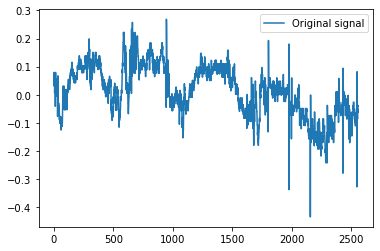

In [6]:
plt.plot(ms_as[0][0])
plt.legend(['Original signal'])

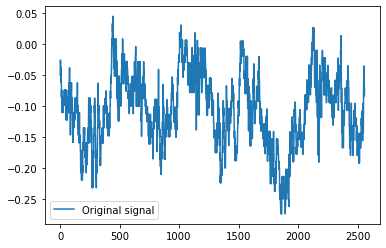

In [7]:
plt.plot(ms_as[0][1])
plt.legend(['Original signal'])

## Let's look at wavelet decomposition for a signal piece

#### how our decomposition filter values look like

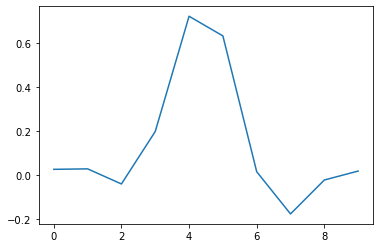

In [8]:
w = pywt.Wavelet('sym5')
plt.plot(w.dec_lo)
coeffs = pywt.wavedec(ms_as[0][0], w, level=6)

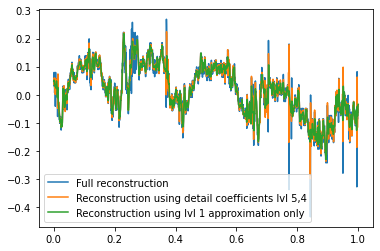

In [9]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
#reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 5,4', 'Reconstruction using lvl 1 approximation only'])

Amplitude of the coefficient corresponds to amplitude with which the wavelet occurs in the signal (y axis), and position of the coefficient corresponds to the time (x axis). 

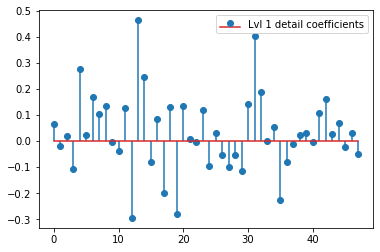

In [10]:
plt.stem(coeffs[1]); plt.legend(['Lvl 1 detail coefficients'])

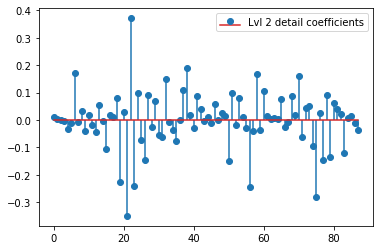

In [11]:
plt.stem(coeffs[2]); plt.legend(['Lvl 2 detail coefficients'])


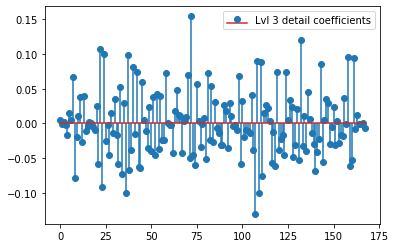

In [12]:
plt.stem(coeffs[3]); plt.legend(['Lvl 3 detail coefficients'])


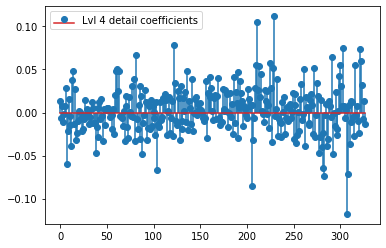

In [13]:
plt.stem(coeffs[4]); plt.legend(['Lvl 4 detail coefficients'])


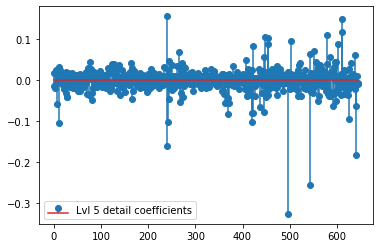

In [14]:
plt.stem(coeffs[5]); plt.legend(['Lvl 5 detail coefficients'])


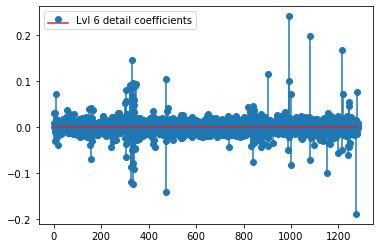

In [15]:
plt.stem(coeffs[6]); plt.legend(['Lvl 6 detail coefficients'])

In [16]:
# Reconstruction of signal using just lvl1 approximation
approx_lvl1 = pywt.waverec(coeffs[:-6] + [None] * 6, w)
# interpolate to original amount of samples (necessary due to numeric solution of transformation not yielding same amount of values)
approx_lvl1_interp = np.interp(x=np.arange(0, len(ms_as[0][0])), xp=np.linspace(0, 525, len(approx_lvl1)), fp=approx_lvl1)
x_without_lvl1approx = ms_as[0][0] - approx_lvl1_interp

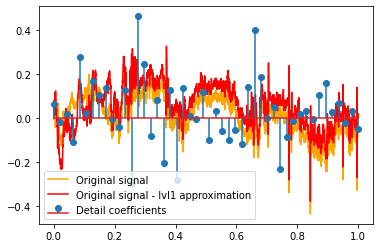

In [17]:
def reconstruction_stem(yyy, **kwargs):
    """Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    plt.stem(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(ms_as[0][0], color='orange')
reconstruction_plot(x_without_lvl1approx, color='red')
reconstruction_stem(coeffs[1])
plt.legend(['Original signal', 'Original signal - lvl1 approximation', 'Detail coefficients'])

### Now let's get coef for all pieces

In [18]:
coef_ms_as_x, coef_ms_as_y, coef_ms_as_z = [], [], []
for i in range(len(ms_as[0])):
    coef_ms_as_x.append(pywt.wavedec(ms_as[0][i], w, level=6))
    coef_ms_as_y.append(pywt.wavedec(ms_as[1][i], w, level=6))
    coef_ms_as_z.append(pywt.wavedec(ms_as[2][i], w, level=6))

In [19]:
coef_ms_mr_x, coef_ms_mr_y, coef_ms_mr_z = [], [], []
for i in range(len(ms_mr[0])):
    coef_ms_mr_x.append(pywt.wavedec(ms_mr[0][i], w, level=6))
    coef_ms_mr_y.append(pywt.wavedec(ms_mr[1][i], w, level=6))
    coef_ms_mr_z.append(pywt.wavedec(ms_mr[2][i], w, level=6))

In [20]:
coef_mr_as_x, coef_mr_as_y, coef_mr_as_z = [], [], []
for i in range(len(mr_as[0])):
    coef_mr_as_x.append(pywt.wavedec(mr_as[0][i], w, level=6))
    coef_mr_as_y.append(pywt.wavedec(mr_as[1][i], w, level=6))
    coef_mr_as_z.append(pywt.wavedec(mr_as[2][i], w, level=6))

In [21]:
coef_mr_ar_x, coef_mr_ar_y, coef_mr_ar_z = [], [], []
for i in range(len(mr_ar[0])):
    coef_mr_ar_x.append(pywt.wavedec(mr_ar[0][i], w, level=6))
    coef_mr_ar_y.append(pywt.wavedec(mr_ar[1][i], w, level=6))
    coef_mr_ar_z.append(pywt.wavedec(mr_ar[2][i], w, level=6))

In [22]:
coef_ar_as_x, coef_ar_as_y, coef_ar_as_z = [], [], []
for i in range(len(ar_as[0])):
    coef_ar_as_x.append(pywt.wavedec(ar_as[0][i], w, level=6))
    coef_ar_as_y.append(pywt.wavedec(ar_as[1][i], w, level=6))
    coef_ar_as_z.append(pywt.wavedec(ar_as[2][i], w, level=6))

In [23]:
import pandas as pd

In [24]:
ms_as = np.stack((coef_ms_as_x, coef_ms_as_y, coef_ms_as_z), axis = 0)
ms_mr = np.stack((coef_ms_mr_x, coef_ms_mr_y, coef_ms_mr_z), axis = 0)

mr_as = np.stack((coef_mr_as_x, coef_mr_as_y, coef_mr_as_z), axis = 0)
mr_ar = np.stack((coef_mr_ar_x, coef_mr_ar_y, coef_mr_ar_z), axis = 0)

ar_as = np.stack((coef_ar_as_x, coef_ar_as_y, coef_ar_as_z), axis = 0)


In [25]:
ms_as.shape

(3, 82, 7)

### Level by level

In [26]:
def level_coef_extractor_3d(array, lvl = 0):
    
    lenn = array[0][0][lvl].shape[0] #48
    coef = np.ones(shape = (array.shape[0], array.shape[1], lenn)) #219,48
    
    for i in range(array.shape[1]):
        coef[0,i,:] = array[0][i][lvl]
        coef[1,i,:] = array[1][i][lvl]
        coef[2,i,:] = array[2][i][lvl]
        
    return coef

In [27]:
def saver(array = 0, lvl = 0, dir_path = None, name = 'blank'):
    coefs = level_coef_extractor_3d(array, lvl)
    np.save(dir_path + "/"+ str(name) + "_lvl_"  + str(lvl), coefs, allow_pickle = True)
    del coefs

In [28]:
saver(ms_as, 0, dir_path, 'ms_as')
saver(ms_mr, 0, dir_path, 'ms_mr')
saver(mr_as, 0, dir_path, 'mr_as')
saver(mr_ar, 0, dir_path, 'mr_ar')
saver(ar_as, 0, dir_path, 'ar_as')

### Check whether each data saved correctly

In [29]:
def column_namer(level = 0, lenght = 48):
    x, y, z = [], [], []
    for i in range(lenght):
        x.append("lvl{0}_x{1}".format(level, i))
        y.append("lvl{0}_y{1}".format(level, i))
        z.append("lvl{0}_z{1}".format(level, i))
    
    return x + y + z

In [30]:
import pandas as pd

In [31]:
def dataframe_checker(path,  disease1 = "None", disease2 = "None", df = pd.DataFrame(), level = 0):

    values, dis  = [], [] 
    dis.append(disease1)
    dis.append(disease2)
    array = np.load(path + "/" + disease1 + "_" + disease2  + "_lvl_{}.npy".format(level), allow_pickle = True)
    columns = column_namer(level = level, lenght = array.shape[2])
    
    for i in range(array.shape[1]):
        values.append(array[0][i].tolist()+ array[1][i].tolist()+ array[2][i].tolist() + dis) 

        medium = pd.DataFrame([values[i]], columns = columns + ["disease1"] + ["disease2"])
        
        df = pd.concat([df, medium], axis = 0)
        
    
    return df

In [32]:
df = dataframe_checker(dir_path, 'MR', 'AS',  level = 0 )

In [33]:
df = dataframe_checker(dir_path, 'MR', 'AR', df, level =0 )
df

,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47,disease1,disease2
0,-0.441509,-0.106747,-0.166443,-0.633404,-0.562829,-0.696955,-0.017861,-0.202512,1.834609,3.121970,...,1.521785,1.914470,1.884296,1.878404,1.900456,1.953781,1.926774,1.892647,MR,AS
0,0.136009,0.126593,0.121965,0.114051,0.023796,0.068965,-0.009958,-0.093525,-0.176699,-0.298289,...,0.743040,0.998608,0.641807,0.037940,0.122300,0.162068,0.146100,0.142782,MR,AS
0,0.216825,0.206028,0.230133,0.308484,0.597905,0.395301,0.555719,0.493670,0.520177,0.428053,...,0.159079,0.084556,-0.051950,0.285387,0.229983,0.225830,0.230299,0.219968,MR,AS
0,0.374564,0.362622,0.348188,0.300850,0.048508,-0.059283,-0.097395,-0.135019,0.015597,0.033819,...,-0.166006,-0.188135,-0.014431,-0.226792,-0.335008,-0.356892,-0.330817,-0.294478,MR,AS
0,-0.330235,-0.362320,-0.339312,-0.249951,-0.048424,-0.104599,-0.145229,-0.248378,-0.090807,-0.219425,...,-0.323071,-0.359847,-0.346790,-0.532676,-0.374905,-0.402620,-0.409296,-0.393922,MR,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.616749,-0.367298,-0.379445,-0.475663,0.374645,0.470827,0.697483,0.838051,0.727523,0.640927,...,0.295745,0.283042,-0.692450,-0.609108,-0.509674,-0.625657,-0.592348,-0.502100,MR,AR
0,7.258282,7.215843,7.158197,6.917831,5.779563,3.403493,3.228615,2.330102,-1.693964,-4.673812,...,0.008482,0.137536,0.145923,0.065124,0.156067,0.134083,0.133192,0.141488,MR,AR
0,0.047846,0.039668,0.025166,-0.019277,-0.237120,-0.714274,-0.877419,-0.970223,-0.033105,-0.389452,...,-0.228205,0.345106,0.340805,1.236407,2.296992,2.014308,1.981809,2.027947,MR,AR
0,-0.423679,-0.659683,-0.603393,-0.369028,-0.579433,-0.846579,-1.278664,-0.993119,-0.763720,-1.126248,...,0.076441,0.091888,0.156638,-0.059629,-0.188428,-0.171944,-0.158100,-0.146383,MR,AR


In [34]:
df = dataframe_checker(dir_path, 'AR','AS', df, level =0 )

In [35]:
df = dataframe_checker(dir_path, 'MS', 'AS', df, level =0 )

In [36]:
df = dataframe_checker(dir_path, 'MS', 'MR', df, level =0 )

In [37]:
df

,lvl0_x0,lvl0_x1,lvl0_x2,lvl0_x3,lvl0_x4,lvl0_x5,lvl0_x6,lvl0_x7,lvl0_x8,lvl0_x9,...,lvl0_z40,lvl0_z41,lvl0_z42,lvl0_z43,lvl0_z44,lvl0_z45,lvl0_z46,lvl0_z47,disease1,disease2
0,-0.441509,-0.106747,-0.166443,-0.633404,-0.562829,-0.696955,-0.017861,-0.202512,1.834609,3.121970,...,1.521785,1.914470,1.884296,1.878404,1.900456,1.953781,1.926774,1.892647,MR,AS
0,0.136009,0.126593,0.121965,0.114051,0.023796,0.068965,-0.009958,-0.093525,-0.176699,-0.298289,...,0.743040,0.998608,0.641807,0.037940,0.122300,0.162068,0.146100,0.142782,MR,AS
0,0.216825,0.206028,0.230133,0.308484,0.597905,0.395301,0.555719,0.493670,0.520177,0.428053,...,0.159079,0.084556,-0.051950,0.285387,0.229983,0.225830,0.230299,0.219968,MR,AS
0,0.374564,0.362622,0.348188,0.300850,0.048508,-0.059283,-0.097395,-0.135019,0.015597,0.033819,...,-0.166006,-0.188135,-0.014431,-0.226792,-0.335008,-0.356892,-0.330817,-0.294478,MR,AS
0,-0.330235,-0.362320,-0.339312,-0.249951,-0.048424,-0.104599,-0.145229,-0.248378,-0.090807,-0.219425,...,-0.323071,-0.359847,-0.346790,-0.532676,-0.374905,-0.402620,-0.409296,-0.393922,MR,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.063624,-0.116311,-0.095682,0.029851,0.216770,0.126891,0.103904,0.139855,0.203691,0.152053,...,0.233832,0.234985,0.206102,0.321739,0.457542,0.426776,0.419729,0.422670,MS,MR
0,0.160955,0.127541,0.132432,0.181104,0.173737,0.177821,0.173468,0.133190,0.180795,0.164669,...,0.318309,0.295681,0.236308,0.416363,0.451829,0.419878,0.425588,0.435717,MS,MR
0,-0.183802,-0.172011,-0.168269,-0.157887,-0.052772,-0.094302,-0.033630,0.007438,0.066805,0.117408,...,0.301542,0.311884,0.280720,0.375058,0.455851,0.437128,0.431987,0.435814,MS,MR
0,0.201973,0.211014,0.219511,0.263884,0.466177,0.447585,0.487150,0.465016,0.473533,0.388000,...,0.164761,0.182359,0.146212,0.126061,0.110647,0.105291,0.109743,0.116828,MS,MR


In [38]:
df.to_csv(csv_path + '/multiple-disease-wavelet-lvl0-coef.csv')

# MEan wavelet

In [39]:
def dataframe_creator(array, disease1 = "None",disease2 = "None", df = pd.DataFrame()):
    values= []
    for i in range(array.shape[1]):
        values.append([[array[0][i][0].mean(), array[0][i][1].mean(), array[0][i][2].mean(), array[0][i][3].mean(),
                        array[0][i][4].mean(), array[0][i][5].mean(), array[0][i][6].mean(),
                        array[1][i][0].mean(), array[1][i][1].mean(), array[1][i][2].mean(), array[1][i][3].mean(),
                        array[1][i][4].mean(), array[1][i][5].mean(), array[1][i][6].mean(),
                        array[2][i][0].mean(), array[2][i][1].mean(), array[2][i][2].mean(), array[2][i][3].mean(),
                        array[2][i][4].mean(),array[2][i][5].mean(), array[2][i][6].mean(), disease1, disease2]])


        medium = pd.DataFrame(values[i], columns =["lvl_x1", "lvl_x2", "lvl_x3", "lvl_x4", "lvl_x5","lvl_x6", "lvl_x7",
                                        "lvl_y1", "lvl_y2", "lvl_y3", "lvl_y4", "lvl_y5","lvl_y6", "lvl_y7",
                                        "lvl_z1", "lvl_z2", "lvl_z3", "lvl_z4", "lvl_z5","lvl_z6", "lvl_z7",
                                                 "disease1", "disease2"])
        df = pd.concat([df, medium], axis = 0)

    return df

In [40]:
df_w = df = pd.DataFrame(columns =["lvl_x1", "lvl_x2", "lvl_x3", "lvl_x4", "lvl_x5","lvl_x6", "lvl_x7",
                                        "lvl_y1", "lvl_y2", "lvl_y3", "lvl_y4", "lvl_y5","lvl_y6", "lvl_y7",
                                        "lvl_z1", "lvl_z2", "lvl_z3", "lvl_z4", "lvl_z5","lvl_z6", "lvl_z7",
                                                 "disease1", "disease2"])
df_w

,lvl_x1,lvl_x2,lvl_x3,lvl_x4,lvl_x5,lvl_x6,lvl_x7,lvl_y1,lvl_y2,lvl_y3,...,lvl_y7,lvl_z1,lvl_z2,lvl_z3,lvl_z4,lvl_z5,lvl_z6,lvl_z7,disease1,disease2


In [41]:

df_w = dataframe_creator(mr_as, "MR", "AS", df = df_w)

df_w = dataframe_creator(mr_ar, "MR", "AR", df = df_w )
df_w = dataframe_creator(ar_as, "AR", "AS", df = df_w )
df_w = dataframe_creator(ms_as, "MS", "AS", df = df_w )
df_w = dataframe_creator(ms_mr, "MS", "MR", df = df_w )

df_w.reset_index(drop = True, inplace = True)
df_w

,lvl_x1,lvl_x2,lvl_x3,lvl_x4,lvl_x5,lvl_x6,lvl_x7,lvl_y1,lvl_y2,lvl_y3,...,lvl_y7,lvl_z1,lvl_z2,lvl_z3,lvl_z4,lvl_z5,lvl_z6,lvl_z7,disease1,disease2
0,0.736579,-0.050448,-0.020048,-0.007968,0.001869,-0.000871,0.000052,-3.480547,0.010993,0.024944,...,0.000169,3.445492,0.059421,0.004523,-0.0072,0.003805,-0.000987,0.000377,MR,AS
1,-0.281438,0.01058,0.00157,-0.00101,-0.003145,-0.000623,-0.000135,-1.350106,-0.005619,0.014116,...,-0.000233,1.381267,-0.011804,0.010991,-0.005747,-0.005091,-0.001148,-0.000112,MR,AS
2,0.250776,0.002438,0.013722,-0.003693,-0.000387,-0.001947,0.00021,-0.258981,0.000269,-0.005734,...,0.000029,0.41334,0.000005,0.002831,-0.01078,-0.000463,-0.001048,0.000402,MR,AS
3,-0.011139,0.00476,0.006687,-0.003612,0.00105,0.001096,-0.00091,-0.066401,0.000656,-0.004176,...,0.000592,0.138327,-0.000182,0.004708,0.001324,-0.005185,0.00028,-0.000141,MR,AS
4,-0.331422,-0.013858,-0.002769,-0.0002,0.002654,0.000827,-0.000089,0.375615,-0.023173,-0.022616,...,-0.000277,-0.295802,-0.013769,-0.016309,0.000228,-0.001282,-0.000964,-0.00026,MR,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.161536,-0.003083,0.000658,0.001708,0.000528,-0.000465,0.000065,0.812466,0.005862,-0.001701,...,0.00011,0.258832,-0.000913,0.001919,0.001603,-0.00014,-0.000103,-0.000139,MS,MR
351,0.018433,-0.000779,0.001947,0.001947,0.001105,0.000031,0.000086,0.514679,0.009741,0.002565,...,0.000022,0.219095,-0.000769,-0.004609,0.007979,0.002448,-0.000088,0.000157,MS,MR
352,0.141838,-0.00396,-0.001553,-0.00188,-0.001939,-0.000334,-0.00007,1.033893,-0.012168,0.022782,...,-0.000172,0.30765,-0.004325,-0.003298,-0.003936,-0.0004,-0.000042,-0.000325,MS,MR
353,0.220932,0.003192,-0.005993,-0.001795,-0.00022,-0.000077,-0.000158,0.767071,0.010353,0.027326,...,-0.000278,0.260641,-0.002183,-0.001471,0.00162,0.000258,0.000483,0.000213,MS,MR


In [42]:
indexes = np.array([0,2,7,10,13,14])

df_w = df_w.iloc[:,indexes]
df_w

,lvl_x1,lvl_x3,lvl_y1,lvl_y4,lvl_y7,lvl_z1
0,0.736579,-0.020048,-3.480547,0.003226,0.000169,3.445492
1,-0.281438,0.00157,-1.350106,0.001316,-0.000233,1.381267
2,0.250776,0.013722,-0.258981,-0.000021,0.000029,0.41334
3,-0.011139,0.006687,-0.066401,-0.001865,0.000592,0.138327
4,-0.331422,-0.002769,0.375615,-0.000464,-0.000277,-0.295802
...,...,...,...,...,...,...
350,0.161536,0.000658,0.812466,-0.001944,0.00011,0.258832
351,0.018433,0.001947,0.514679,0.002932,0.000022,0.219095
352,0.141838,-0.001553,1.033893,0.001645,-0.000172,0.30765
353,0.220932,-0.005993,0.767071,-0.000302,-0.000278,0.260641


In [43]:
df_w.to_csv(csv_path + '/p-value-selected-multiple-disease-mean-wavelet.csv')